In [1]:
import os
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [3]:
data_root = r"C:/Users/hayashi/doutorado/mac6958--dados-redes/webrtc"


In [4]:
file_path = Path(data_root, 'data/processed/facial-1007-sequential.pkl')

In [5]:
data = load_data(file_path)

In [6]:
X,Y = data

In [7]:
X.shape, Y.shape

((34880, 30, 323), (34880, 5))

'user_id': -1.647508942095828,
'test_condition': 0.4629100498862757,
'delay': 1.0690449676496976,
'jitter': 1.224744871391589,
'packet_loss_rate': 0.0

In [8]:
Y[0]

array([-1.64750894,  0.46291005,  1.06904497,  1.22474487,  0.        ])

In [10]:
Y[0,2:]

array([1.06904497, 1.22474487, 0.        ])

In [11]:
Y_factor = Y[:,2:]

In [13]:
X.shape, Y_factor.shape

((34880, 30, 323), (34880, 3))

In [14]:
Y = Y_factor

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [16]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(27904, 30, 323)

In [17]:
# Build the model
model = Sequential([
    GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(3)  # Linear activation for regression
])

C:\Users\hayashi\doutorado\mac6958--dados-redes\webrtc\venv.2\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

In [19]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 50)              │          56,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,703 (280.09 KB)

 Trainable params: 71,703 (280.09 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1366 - mse: 0.1366 - val_loss: 1.6159e-04 - val_mse: 1.6159e-04
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 3.7793e-04 - val_mse: 3.7793e-04
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 3.5767e-05 - val_mse: 3.5767e-05
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 1.2288e-04 - val_mse: 1.2288e-04
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 9.0420e-05 - val_mse: 9.0420e-05
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 6.8360e-05 - val_mse: 6.8360e-05
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.3345e-05 - val_mse: 5.3345e-05
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 2.8212e-05 - val_

In [21]:
# Evaluate the model on the validation set
val_loss, val_mse = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation MSE: {val_mse}")

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5663e-06 - mse: 6.5663e-06
Validation Loss: 6.569635843334254e-06
Validation MSE: 6.569635843334254e-06


In [22]:
import matplotlib.pyplot as plt

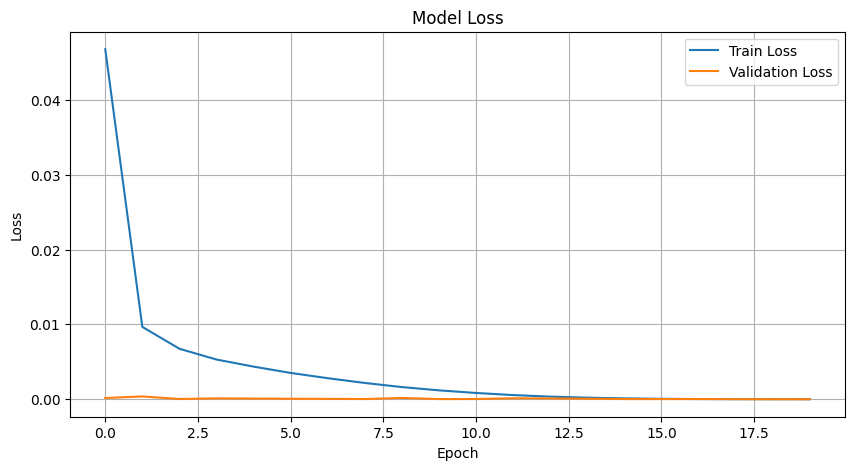

In [23]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()